# Environment configuration

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr
import cartopy.crs as ccrs

In [2]:
import matplotlib.patches as mpatches

In [3]:
# Imports for xclim and xarray
import xclim.indices as indices
import xclim.atmos as atmos
import numpy as np
import xarray as xr

In [4]:
# plotting
import matplotlib.pyplot as plt

# File handling libraries
import os
import glob
import time
import tempfile
from pathlib import Path

# Output folder
output_folder = Path(tempfile.mkdtemp())

In [1]:
path = "/home/mlopez/EXEC/Data/Partial/" #Doris


# Setting up the Dask client: parallel processing


In [5]:
from distributed import Client

# Depending on your workstation specifications, you may need to adjust these values.
client=Client(n_workers=2, threads_per_worker=4, memory_limit="4GB")
client

Client Scheduler: tcp://127.0.0.1:41955 Dashboard: http://127.0.0.1:8787/status,Cluster Workers: 2 Cores: 8 Memory: 8.00 GB


# Creating xarray datasets

In [9]:
# This file is opened as one big chunk: no parallel processing.

os.chdir('//home/mlopez/EXEC/Data/')
data_source = "Partial"
rcps = ["rcp85"]
variable = "tasmax"
rcp = rcps[0]
time_step = "day"
#tasmax_day_IPSL-CM5B-LR_rcp85_r1i1p1_na10kgrid_qm-moving-50bins-detrend_2019

search_str = os.path.join(data_source,'*{v}*IPSL-CM5B*{r}*.nc'.format(v=variable,r=rcp))
print(search_str)
sim_files= sorted(glob.glob(search_str))

print(len(sim_files))

Partial/*tasmax*IPSL-CM5B*rcp85*.nc
3


In [10]:
# Chunking in memory along the time dimension.
# Note that the data type is a 'dask.array'. xarray will automatically use client workers.
ds = xr.open_dataset(sim_files[0], chunks={'time': 31})

print(ds.tasmax, '\n\n', ds.tasmax.chunks)

<xarray.DataArray 'tasmax' (time: 365, lat: 700, lon: 1064)>
dask.array<open_dataset-d3d727b15baf42a5433144c7d630874etasmax, shape=(365, 700, 1064), dtype=float32, chunksize=(31, 700, 1064), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) object 2019-01-01 00:00:00 ... 2019-12-31 00:00:00
  * lat      (lat) float32 83.28931 83.20598 83.12265 ... 25.12497 25.04164
  * lon      (lon) float32 -141.04314 -140.9598 ... -52.54667 -52.46334
Attributes:
    units:          K
    long_name:      air_temperature
    standard_name:  air_temperature 

 ((31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 24), (700,), (1064,))


In [11]:
# Create multi-file data & chunks
ds = xr.open_mfdataset(sim_files, chunks={'time':365, 'lat':50, 'lon':56}, drop_variables=['time_vectors','ts'])
print(ds)

<xarray.Dataset>
Dimensions:  (lat: 700, lon: 1064, time: 1095)
Coordinates:
  * lon      (lon) float32 -141.04314 -140.9598 ... -52.54667 -52.46334
  * lat      (lat) float32 83.28931 83.20598 83.12265 ... 25.12497 25.04164
  * time     (time) object 2019-01-01 00:00:00 ... 2021-12-31 00:00:00
Data variables:
    tasmax   (time, lat, lon) float32 dask.array<chunksize=(365, 50, 56), meta=np.ndarray>
Attributes:
    Conventions:     CF-1.5
    title:           IPSL-CM5B-LR model output prepared for CMIP5 historical
    history:         2012-01-28T12:43:13Z CMOR rewrote data to comply with CF...
    institution:     IPSL (Institut Pierre Simon Laplace, Paris, France)
    source:          IPSL-CM5B-LR (2011) : atmos : LMDZ5 (LMDZ5_NPv3.1, 96x95...
    redistribution:  Redistribution prohibited. For internal use only.


# SUBSETTING UTILITIES

# subset_bbox : using a latitude-longitude bounding box

In [23]:
from xclim import subset
lat_bnds = [45, 60]
lon_bnds = [-82, -55]

ds1 = subset.subset_bbox(ds,lat_bnds=lat_bnds,lon_bnds=lon_bnds)

print(ds1)

<xarray.Dataset>
Dimensions:  (lat: 180, lon: 324, time: 1095)
Coordinates:
  * lon      (lon) float32 -81.96216 -81.87883 -81.7955 ... -55.1299 -55.04657
  * lat      (lat) float32 59.95691 59.87358 59.79025 ... 45.12417 45.04084
  * time     (time) object 2019-01-01 00:00:00 ... 2021-12-31 00:00:00
Data variables:
    tasmax   (time, lat, lon) float32 dask.array<chunksize=(365, 20, 19), meta=np.ndarray>
Attributes:
    Conventions:     CF-1.5
    title:           IPSL-CM5B-LR model output prepared for CMIP5 historical
    history:         2012-01-28T12:43:13Z CMOR rewrote data to comply with CF...
    institution:     IPSL (Institut Pierre Simon Laplace, Paris, France)
    source:          IPSL-CM5B-LR (2011) : atmos : LMDZ5 (LMDZ5_NPv3.1, 96x95...
    redistribution:  Redistribution prohibited. For internal use only.


# Add start and/or end years

In [13]:
ds2 = subset.subset_bbox(ds,lat_bnds=lat_bnds,lon_bnds=lon_bnds, start_yr=2015, end_yr=2030)
print(ds2, "\n")

  """Entry point for launching an IPython kernel.

  da = subset_time(da, start_date=start_date, end_date=end_date)

  da = subset_time(da, start_date=start_date, end_date=end_date)



<xarray.Dataset>
Dimensions:  (lat: 180, lon: 0, time: 1095)
Coordinates:
  * lon      (lon) float32 
  * lat      (lat) float32 59.95691 59.87358 59.79025 ... 45.12417 45.04084
  * time     (time) object 2019-01-01 00:00:00 ... 2021-12-31 00:00:00
Data variables:
    tasmax   (time, lat, lon) float32 dask.array<chunksize=(365, 20, 0), meta=np.ndarray>
Attributes:
    Conventions:     CF-1.5
    title:           IPSL-CM5B-LR model output prepared for CMIP5 historical
    history:         2012-01-28T12:43:13Z CMOR rewrote data to comply with CF...
    institution:     IPSL (Institut Pierre Simon Laplace, Paris, France)
    source:          IPSL-CM5B-LR (2011) : atmos : LMDZ5 (LMDZ5_NPv3.1, 96x95...
    redistribution:  Redistribution prohibited. For internal use only. 



# Subset years only

In [14]:
ds2 = subset.subset_bbox(ds, start_yr=2015, end_yr=2030)
print(ds2)

  """Entry point for launching an IPython kernel.

  da = subset_time(da, start_date=start_date, end_date=end_date)

  da = subset_time(da, start_date=start_date, end_date=end_date)



<xarray.Dataset>
Dimensions:  (lat: 700, lon: 1064, time: 1095)
Coordinates:
  * lon      (lon) float32 -141.04314 -140.9598 ... -52.54667 -52.46334
  * lat      (lat) float32 83.28931 83.20598 83.12265 ... 25.12497 25.04164
  * time     (time) object 2019-01-01 00:00:00 ... 2021-12-31 00:00:00
Data variables:
    tasmax   (time, lat, lon) float32 dask.array<chunksize=(365, 50, 56), meta=np.ndarray>
Attributes:
    Conventions:     CF-1.5
    title:           IPSL-CM5B-LR model output prepared for CMIP5 historical
    history:         2012-01-28T12:43:13Z CMOR rewrote data to comply with CF...
    institution:     IPSL (Institut Pierre Simon Laplace, Paris, France)
    source:          IPSL-CM5B-LR (2011) : atmos : LMDZ5 (LMDZ5_NPv3.1, 96x95...
    redistribution:  Redistribution prohibited. For internal use only.


# Selecting a single grid point

In [15]:
lon_pt = -70.0
lat_pt = 50.0

ds3 = subset.subset_gridpoint(ds,lon=lon_pt,lat=lat_pt, start_yr=1981, end_yr=2010)
print(ds3)

  after removing the cwd from sys.path.

  da = subset_time(da, start_date=start_date, end_date=end_date)

  da = subset_time(da, start_date=start_date, end_date=end_date)



<xarray.Dataset>
Dimensions:  (time: 1095)
Coordinates:
    lon      float32 -69.96264
    lat      float32 50.04064
  * time     (time) object 2019-01-01 00:00:00 ... 2021-12-31 00:00:00
Data variables:
    tasmax   (time) float32 dask.array<chunksize=(365,), meta=np.ndarray>
Attributes:
    Conventions:     CF-1.5
    title:           IPSL-CM5B-LR model output prepared for CMIP5 historical
    history:         2012-01-28T12:43:13Z CMOR rewrote data to comply with CF...
    institution:     IPSL (Institut Pierre Simon Laplace, Paris, France)
    source:          IPSL-CM5B-LR (2011) : atmos : LMDZ5 (LMDZ5_NPv3.1, 96x95...
    redistribution:  Redistribution prohibited. For internal use only.


# Create a plot of subsetted data

Text(0, 0.5, 'daily maximum temperature (°K)')

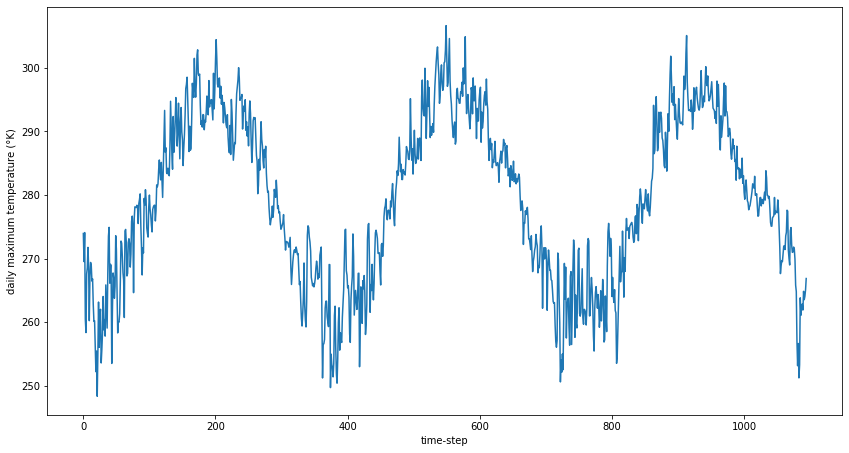

In [16]:
%matplotlib inline
plt.rcParams['figure.figsize'] = [9.5*1.5, 5*1.5]
plt.plot(ds3.tasmax)
plt.xlabel('time-step')
plt.ylabel(f'daily maximum temperature (\u00b0{ds3.tasmax.units})')

# Climate index calculation & resampling frequencies

## Annual maximum temperature of the daily maximum temperature (tx_max)

In [28]:
fr = 'MS'
ds1.tasmax.attrs['cell_methods'] = 'time: maximum within days'
out = atmos.tx_max(ds1.tasmax, freq=fr)
print(f'Number of time-steps using freq == {fr} : {len(out.time)}\n')
print(out.time)

Number of time-steps using freq == MS : 36

<xarray.DataArray 'time' (time: 36)>
array([cftime.DatetimeNoLeap(2019-01-01 00:00:00),
       cftime.DatetimeNoLeap(2019-02-01 00:00:00),
       cftime.DatetimeNoLeap(2019-03-01 00:00:00),
       cftime.DatetimeNoLeap(2019-04-01 00:00:00),
       cftime.DatetimeNoLeap(2019-05-01 00:00:00),
       cftime.DatetimeNoLeap(2019-06-01 00:00:00),
       cftime.DatetimeNoLeap(2019-07-01 00:00:00),
       cftime.DatetimeNoLeap(2019-08-01 00:00:00),
       cftime.DatetimeNoLeap(2019-09-01 00:00:00),
       cftime.DatetimeNoLeap(2019-10-01 00:00:00),
       cftime.DatetimeNoLeap(2019-11-01 00:00:00),
       cftime.DatetimeNoLeap(2019-12-01 00:00:00),
       cftime.DatetimeNoLeap(2020-01-01 00:00:00),
       cftime.DatetimeNoLeap(2020-02-01 00:00:00),
       cftime.DatetimeNoLeap(2020-03-01 00:00:00),
       cftime.DatetimeNoLeap(2020-04-01 00:00:00),
       cftime.DatetimeNoLeap(2020-05-01 00:00:00),
       cftime.DatetimeNoLeap(2020-06-01 00:00:00),
 

In [25]:
ds1

<xarray.Dataset>
Dimensions:  (lat: 180, lon: 324, time: 1095)
Coordinates:
  * lon      (lon) float32 -81.96216 -81.87883 -81.7955 ... -55.1299 -55.04657
  * lat      (lat) float32 59.95691 59.87358 59.79025 ... 45.12417 45.04084
  * time     (time) object 2019-01-01 00:00:00 ... 2021-12-31 00:00:00
Data variables:
    tasmax   (time, lat, lon) float32 dask.array<chunksize=(365, 20, 19), meta=np.ndarray>
Attributes:
    Conventions:     CF-1.5
    title:           IPSL-CM5B-LR model output prepared for CMIP5 historical
    history:         2012-01-28T12:43:13Z CMOR rewrote data to comply with CF...
    institution:     IPSL (Institut Pierre Simon Laplace, Paris, France)
    source:          IPSL-CM5B-LR (2011) : atmos : LMDZ5 (LMDZ5_NPv3.1, 96x95...
    redistribution:  Redistribution prohibited. For internal use only.

In [29]:
out

<xarray.DataArray 'tx_max' (time: 36, lat: 180, lon: 324)>
dask.array<where, shape=(36, 180, 324), dtype=float32, chunksize=(1, 50, 56), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) object 2019-01-01 00:00:00 ... 2021-12-01 00:00:00
  * lon      (lon) float32 -81.96216 -81.87883 -81.7955 ... -55.1299 -55.04657
  * lat      (lat) float32 59.95691 59.87358 59.79025 ... 45.12417 45.04084
Attributes:
    units:          K
    long_name:      Maximum daily maximum temperature
    standard_name:  air_temperature
    cell_methods:   time: maximum within days time: maximum within days time:...
    history:        [2020-01-05 16:45:28] tx_max: tx_max(tasmax: xarray.core....
    description:    Monthly maximum of daily maximum temperature.

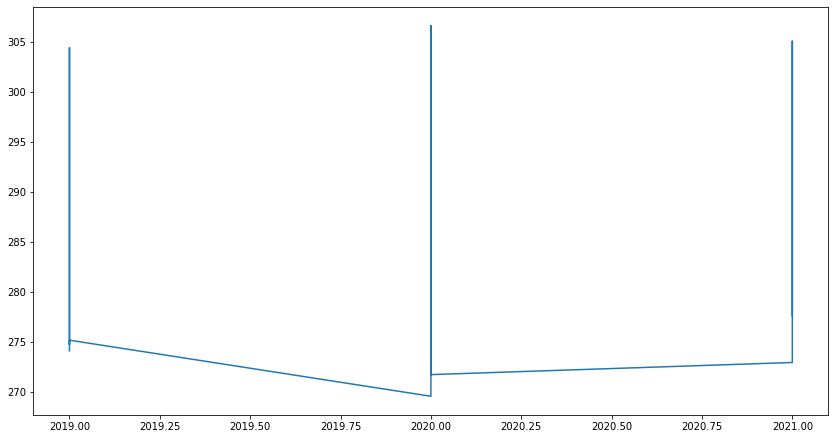

In [30]:
out1 = subset.subset_gridpoint(out,lon=lon_pt, lat=lat_pt)
%matplotlib inline
plt.rcParams['figure.figsize'] = [9.5*1.5, 5*1.5]
plt.plot(out1.time.dt.year, out1)

# Marina's code

In [2]:
#REGEX to find all files starting with the relevant vairable, any model, any rcp and any year:
file.names <- dir(path, pattern = "^tasmax_day_[A-Za-z1-9-]+_rcp[0-9]+_r1i1p1_na10kgrid_qm-moving-50bins-detrend_[0-9]+[.]nc")
file.names

NameError: name 'file' is not defined

In [3]:
#opening and transfering data into an array
tempMax = xr.open_dataset("/home/mlopez/EXEC/Données test/tasmax_day_BNU-ESM_rcp45_r1i1p1_na10kgrid_qm-moving-50bins-detrend_1956.nc")

In [4]:
tempMax

<xarray.Dataset>
Dimensions:       (lat: 700, lon: 1064, time: 365, ts: 3)
Coordinates:
  * ts            (ts) float32 nan nan nan
  * time          (time) object 1956-01-01 00:00:00 ... 1956-12-31 00:00:00
  * lat           (lat) float32 83.28931 83.20598 83.12265 ... 25.12497 25.04164
  * lon           (lon) float32 -141.04314 -140.9598 ... -52.54667 -52.46334
Data variables:
    time_vectors  (time, ts) int32 ...
    tasmax        (time, lat, lon) float32 ...
Attributes:
    Conventions:     CF-1.5
    title:           BNU-ESM model output prepared for CMIP5 historical
    history:         2012-03-12T06:02:50Z CMOR rewrote data to comply with CF...
    institution:     GCESS,BNU,Beijing,China
    source:          BNU-ESM\n30-day moving window 50-bins quantile mapping w...
    redistribution:  Redistribution prohibited. For internal use only.

In [6]:
#Transfering array to dataframe and droping NaN values
df = tempMax.to_dataframe().dropna()
df.head()

time_vectors      tasmax
lat       lon        time                ts                           
66.623306 -89.045212 1956-01-01 00:00:00 NaN          1956  240.807495
                                         NaN             1  240.807495
                                         NaN             1  240.807495
                     1956-01-02 00:00:00 NaN          1956  242.874939
                                         NaN             1  242.874939

# Plotting Timeseries

In [7]:
#Grouping by time. Getting rid off latitude and longitud for timeseries. We will plott the mean per day of max temperature
AllcoordTempMean = df.groupby("time").mean()
AllcoordTempMean.head()

,time_vectors,tasmax
time,,
1956-01-01 00:00:00,652.666667,261.011810
1956-01-02 00:00:00,653.000000,263.771912
1956-01-03 00:00:00,653.333333,264.666656
1956-01-04 00:00:00,653.666667,263.498505
1956-01-05 00:00:00,654.000000,261.698914


In [8]:
#Adding column of temperature in Celsius
empMeanC = AllcoordTempMean
TempMeanC["tasmaxC"] = TempMeanC["tasmax"] -273.15
TempMeanC.head()


,time_vectors,tasmax,tasmaxC
time,,,
1956-01-01 00:00:00,652.666667,261.011810,-12.138184
1956-01-02 00:00:00,653.000000,263.771912,-9.378082
1956-01-03 00:00:00,653.333333,264.666656,-8.483337
1956-01-04 00:00:00,653.666667,263.498505,-9.651489
1956-01-05 00:00:00,654.000000,261.698914,-11.451080


Text(0.5, 1.0, 'Temperature Maximale')

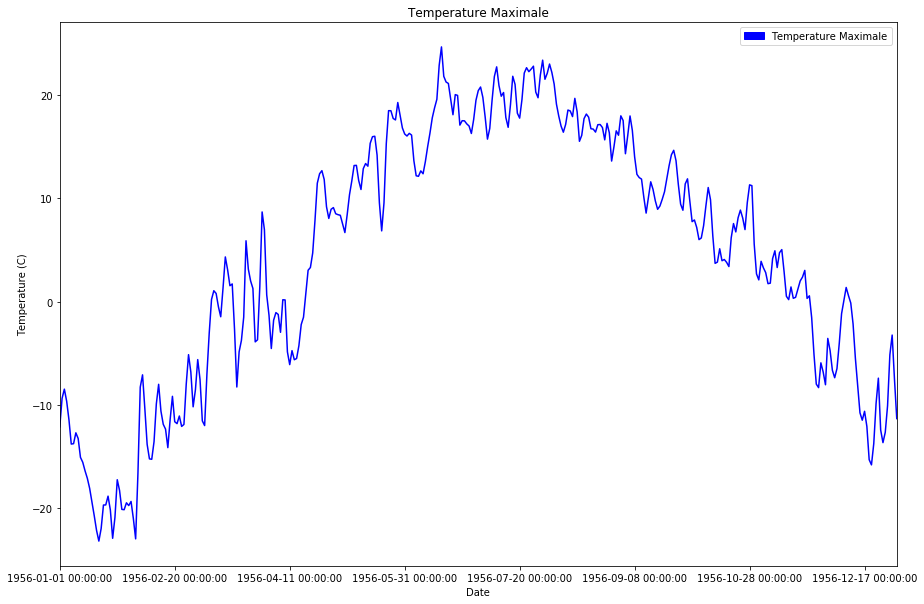

In [9]:
# plot time series
TempMeanC['tasmaxC'].plot.line('o-',color='blue',figsize=(15,10))

# add colour reference
blue_patch = mpatches.Patch(color='blue', label='Temperature Maximale')
plt.legend(handles=[blue_patch,])

# add titles
plt.xlabel('Date')
plt.ylabel('Temperature (C)')
plt.title('Temperature Maximale')


# Plotting Map

In [12]:
#Grouping by latitude and longitude. Getting rid off time by doing the mean of all the year for each location point
AlltimeTempMean = df.groupby(["lat","lon"]).mean()
AlltimeTempMean.head()

time_vectors      tasmax
lat       lon                                 
40.041039 -89.045212    659.415525  291.249939
          -88.961884    659.415525  291.233185
          -88.878548    659.415525  291.216064
          -88.795219    659.415525  291.142212
          -88.711891    659.415525  291.161682

In [13]:
#Adding column of temperature in Celsius
AlltimeTempMean["tasmaxC"] = AlltimeTempMean["tasmax"] -273.15

In [14]:
AlltimeTempMean.head()

time_vectors      tasmax    tasmaxC
lat       lon                                            
40.041039 -89.045212    659.415525  291.249939  18.099939
          -88.961884    659.415525  291.233185  18.083185
          -88.878548    659.415525  291.216064  18.066064
          -88.795219    659.415525  291.142212  17.992212
          -88.711891    659.415525  291.161682  18.011682

In [15]:
#Reseting index to get correctly lat and lon column names
GeoTempMeanC = AlltimeTempMean.reset_index()

In [16]:
GeoTempMeanC["tasmaxC"]

0        18.099939
1        18.083185
2        18.066064
3        17.992212
4        18.011682
           ...    
76201    -6.375861
76202    -6.743079
76203    -6.499670
76204    -6.419318
76205    -5.723700
Name: tasmaxC, Length: 76206, dtype: float64

In [17]:
GeoTempMeanC["lat"]

0        40.041039
1        40.041039
2        40.041039
3        40.041039
4        40.041039
           ...    
76201    66.623306
76202    66.623306
76203    66.623306
76204    66.623306
76205    66.623306
Name: lat, Length: 76206, dtype: float64

No handles with labels found to put in legend.


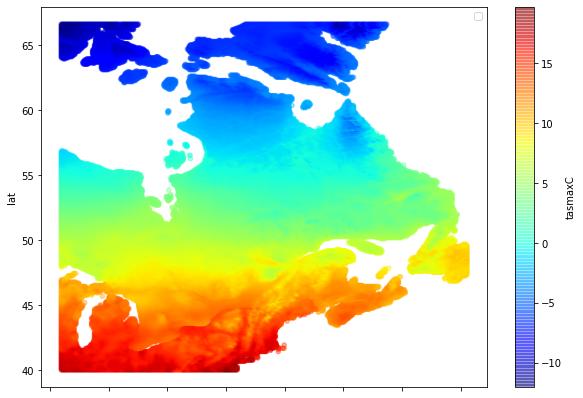

In [18]:
#Plotting map
GeoTempMeanC.plot(kind="scatter", x="lon", y="lat",
    c="tasmaxC", cmap=plt.get_cmap("jet"),
    colorbar=True, alpha=0.4, figsize=(10,7),
)
plt.legend()
plt.show()